In [1]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
import seaborn as sns
from nltk.tokenize import word_tokenize 
from nltk.collocations import *
import nltk
from nltk.stem import WordNetLemmatizer
import seaborn as sns
from collections import Counter

In [2]:
abstracts_full = pd.read_csv("abstracts_ed_06112018.txt", sep="\t")

In [9]:
abstracts_full.head(3)
stop = stopwords.words('english')


In [12]:
def freq_words_by_year(year):
    abstracts_full = pd.read_csv("abstracts_ed_06112018.txt", sep="\t")
    
    abstracts_year = abstracts_full[abstracts_full["Year"] == year]["Abstract"]
    abstracts_year_cat = abstracts_year.str.cat(sep=" ")
    
    punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{}~'   # `|` is not present here
    transtab = str.maketrans(dict.fromkeys(punct, ''))
    abstracts_year_no_punct = abstracts_year_cat.translate(transtab)
    
    stop_words = stopwords.words('english')
    word_tokens_year = word_tokenize(abstracts_year_no_punct.lower()) 
    
    filtered_sentence_year = [] 
    for w in word_tokens_year: 
        if w not in stop_words: 
            filtered_sentence_year.append(w)
    
    #retirar a lematization, 16S é removido
    '''
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized_year = []
    
    
    for w in filtered_sentence_year:
        lemmatized_w = wordnet_lemmatizer.lemmatize(w)
        lemmatized_year.append(lemmatized_w)
    '''
        
    freq_dict = Counter(filtered_sentence_year)

    freq_df = pd.DataFrame.from_dict(freq_dict, orient='index').reset_index()
    freq_df.columns = ["word", "freq"]
    
    freq_df.to_csv("{}_word_freq.csv".format(year))


In [13]:
for i in range(2001,2019):
    freq_words_by_year(i)

In [15]:
tabela = pd.read_csv("abstracts_ed_06112018.txt", sep="\t")

abstracts = tabela["Abstract"]
abstracts_cat = abstracts.str.cat(sep=" ")

punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{}~'   # `|` is not present here
transtab = str.maketrans(dict.fromkeys(punct, ''))
abstracts_no_punct = abstracts_cat.translate(transtab)

stop_words = stopwords.words('english')
word_tokens = word_tokenize(abstracts_no_punct.lower()) 

filtered_sentence = [] 
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

#retirar a lematization, 16S é removido
'''
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized_year = []


for w in filtered_sentence_year:
lemmatized_w = wordnet_lemmatizer.lemmatize(w)
lemmatized_year.append(lemmatized_w)
'''

freq_dict = Counter(filtered_sentence)

freq_df = pd.DataFrame.from_dict(freq_dict, orient='index').reset_index()
freq_df.columns = ["word", "all"]

freq_df.to_csv("all_word_freq.csv")


In [16]:
df_2001 = pd.read_table('2001_word_freq.csv', sep=',', index_col=0)
df_2002 = pd.read_table('2002_word_freq.csv', sep=',', index_col=0)
df_2003 = pd.read_table('2003_word_freq.csv', sep=',', index_col=0)
df_2004 = pd.read_table('2004_word_freq.csv', sep=',', index_col=0)
df_2005 = pd.read_table('2005_word_freq.csv', sep=',', index_col=0)
df_2006 = pd.read_table('2006_word_freq.csv', sep=',', index_col=0)
df_2007 = pd.read_table('2007_word_freq.csv', sep=',', index_col=0)
df_2008 = pd.read_table('2008_word_freq.csv', sep=',', index_col=0)
df_2009 = pd.read_table('2009_word_freq.csv', sep=',', index_col=0)
df_2010 = pd.read_table('2010_word_freq.csv', sep=',', index_col=0)
df_2011 = pd.read_table('2011_word_freq.csv', sep=',', index_col=0)
df_2012 = pd.read_table('2012_word_freq.csv', sep=',', index_col=0)
df_2013 = pd.read_table('2013_word_freq.csv', sep=',', index_col=0)
df_2014 = pd.read_table('2014_word_freq.csv', sep=',', index_col=0)
df_2015 = pd.read_table('2015_word_freq.csv', sep=',', index_col=0)
df_2016 = pd.read_table('2016_word_freq.csv', sep=',', index_col=0)
df_2017 = pd.read_table('2017_word_freq.csv', sep=',', index_col=0)
df_2018 = pd.read_table('2018_word_freq.csv', sep=',', index_col=0)

In [17]:
from functools import reduce

dfs = [df_2001, df_2002, df_2003, df_2004, df_2005, df_2006, df_2007, df_2008, df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018]
df_final = reduce(lambda left,right: pd.merge(left,right,on='word',how='outer'), dfs)
df_final.columns = ["word", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018" ]




In [18]:
df_final = df_final.set_index("word")
df_final

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
word,,,,,,,,,,,,,,,,,,
forty-six,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
strains,321.0,383.0,444.0,590.0,693.0,634.0,774.0,580.0,812.0,750.0,776.0,723.0,1096.0,1071.0,1106.0,971.0,1037.0,601.0
acetic,5.0,1.0,1.0,10.0,8.0,7.0,6.0,7.0,9.0,6.0,7.0,8.0,12.0,3.0,13.0,7.0,6.0,3.0
acid,84.0,155.0,160.0,172.0,195.0,199.0,310.0,243.0,319.0,305.0,335.0,321.0,461.0,424.0,536.0,493.0,436.0,267.0
bacteria,77.0,97.0,92.0,125.0,96.0,85.0,103.0,76.0,91.0,84.0,77.0,99.0,117.0,108.0,99.0,87.0,96.0,78.0
newly,6.0,3.0,5.0,4.0,4.0,3.0,2.0,2.0,1.0,1.0,10.0,2.0,6.0,6.0,8.0,4.0,12.0,8.0
isolated,151.0,194.0,218.0,278.0,340.0,381.0,472.0,433.0,486.0,473.0,511.0,543.0,848.0,763.0,907.0,818.0,911.0,567.0
flowers,2.0,NaN,1.0,3.0,NaN,1.0,NaN,1.0,1.0,1.0,3.0,NaN,NaN,NaN,1.0,NaN,2.0,1.0
fruits,1.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN


In [19]:
n_year = pd.DataFrame(abstracts_full["Year"].value_counts()).reset_index()
n_year.columns = ["Year", "Frequency"]
n_year = n_year.sort_values(by="Year")
n_year_ed = n_year.set_index("Year")
n_year_transposed = n_year_ed.transpose()
n_year_transposed.columns = ["2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]
n_year_transposed

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Frequency,156,228,256,320,370,400,504,451,516,515,535,561,874,777,928,839,938,578


In [20]:
relative = df_final.div(n_year_transposed.iloc[0])

In [21]:
relative

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
word,,,,,,,,,,,,,,,,,,
forty-six,0.006410,NaN,NaN,NaN,NaN,0.0025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001066,NaN
strains,2.057692,1.679825,1.734375,1.843750,1.872973,1.5850,1.535714,1.286031,1.573643,1.456311,1.450467,1.288770,1.254005,1.378378,1.191810,1.157330,1.105544,1.039792
acetic,0.032051,0.004386,0.003906,0.031250,0.021622,0.0175,0.011905,0.015521,0.017442,0.011650,0.013084,0.014260,0.013730,0.003861,0.014009,0.008343,0.006397,0.005190
acid,0.538462,0.679825,0.625000,0.537500,0.527027,0.4975,0.615079,0.538803,0.618217,0.592233,0.626168,0.572193,0.527460,0.545689,0.577586,0.587604,0.464819,0.461938
bacteria,0.493590,0.425439,0.359375,0.390625,0.259459,0.2125,0.204365,0.168514,0.176357,0.163107,0.143925,0.176471,0.133867,0.138996,0.106681,0.103695,0.102345,0.134948
newly,0.038462,0.013158,0.019531,0.012500,0.010811,0.0075,0.003968,0.004435,0.001938,0.001942,0.018692,0.003565,0.006865,0.007722,0.008621,0.004768,0.012793,0.013841
isolated,0.967949,0.850877,0.851562,0.868750,0.918919,0.9525,0.936508,0.960089,0.941860,0.918447,0.955140,0.967914,0.970252,0.981982,0.977371,0.974970,0.971215,0.980969
flowers,0.012821,NaN,0.003906,0.009375,NaN,0.0025,NaN,0.002217,0.001938,0.001942,0.005607,NaN,NaN,NaN,0.001078,NaN,0.002132,0.001730
fruits,0.006410,0.013158,0.003906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001869,0.003565,NaN,NaN,NaN,NaN,0.002132,NaN


In [22]:
transposed_relative = relative.T
transposed_relative

word,forty-six,strains,acetic,acid,bacteria,newly,isolated,flowers,fruits,fermented,...,d34,k207,d232,d237,haloacid,sm-degradation,tx0653t,951-908,metallum,112495t
2001,0.006410,2.057692,0.032051,0.538462,0.493590,0.038462,0.967949,0.012821,0.006410,0.057692,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,NaN,1.679825,0.004386,0.679825,0.425439,0.013158,0.850877,NaN,0.013158,0.057018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,NaN,1.734375,0.003906,0.625000,0.359375,0.019531,0.851562,0.003906,0.003906,0.046875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,NaN,1.843750,0.031250,0.537500,0.390625,0.012500,0.868750,0.009375,NaN,0.028125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,NaN,1.872973,0.021622,0.527027,0.259459,0.010811,0.918919,NaN,NaN,0.037838,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,0.002500,1.585000,0.017500,0.497500,0.212500,0.007500,0.952500,0.002500,NaN,0.017500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,1.535714,0.011905,0.615079,0.204365,0.003968,0.936508,NaN,NaN,0.037698,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,1.286031,0.015521,0.538803,0.168514,0.004435,0.960089,0.002217,NaN,0.019956,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,NaN,1.573643,0.017442,0.618217,0.176357,0.001938,0.941860,0.001938,NaN,0.019380,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,NaN,1.456311,0.011650,0.592233,0.163107,0.001942,0.918447,0.001942,NaN,0.044660,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
transposed_relative.to_csv("trans_relative_word.csv")

In [24]:
transposed_relative["ani"]

2001         NaN
2002         NaN
2003         NaN
2004         NaN
2005         NaN
2006         NaN
2007         NaN
2008         NaN
2009    0.003876
2010         NaN
2011         NaN
2012    0.003565
2013    0.006865
2014    0.019305
2015    0.034483
2016    0.039333
2017    0.086354
2018    0.058824
Name: ani, dtype: float64

In [32]:
country = transposed_relative[['china', 'korea', 'japan', 'india', 'taiwan', 'usa', 'spain', 'russia', 'germany', 'france']].T

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt


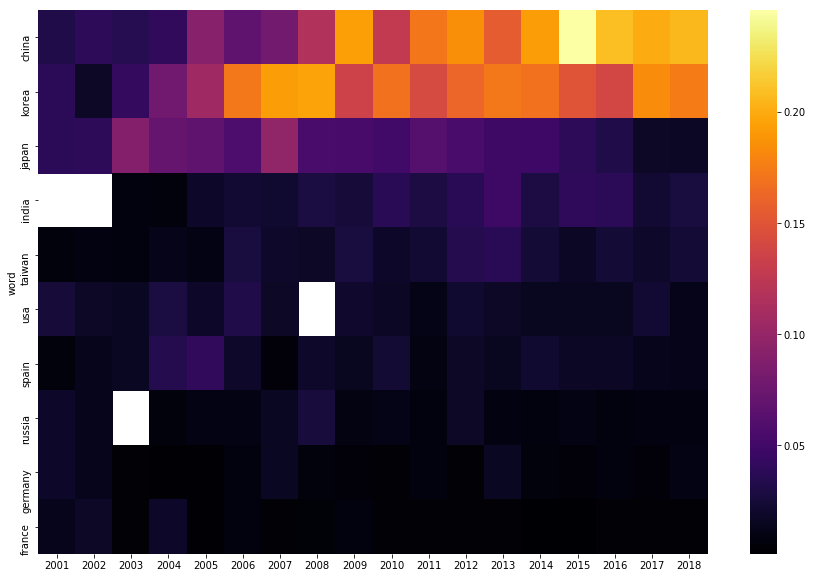

In [75]:
plt.figure(figsize=(15,10))
sns.heatmap(country, cmap="inferno")

In [37]:
genus = transposed_relative[['bacillus', 'streptomyces', 'paenibacillus', 'flavobacterium', 'pseudomonas', 'lactobacillus', 'sphingomonas', 'chryseobacterium', 'mycobacterium', 'pedobacter', 'vibrio', 'halomonas', 'clostridium', 'nocardia', 'microbacterium', 'burkholderia', 'micromonospora', 'streptococcus', 'deinococcus', 'lysobacter']].T

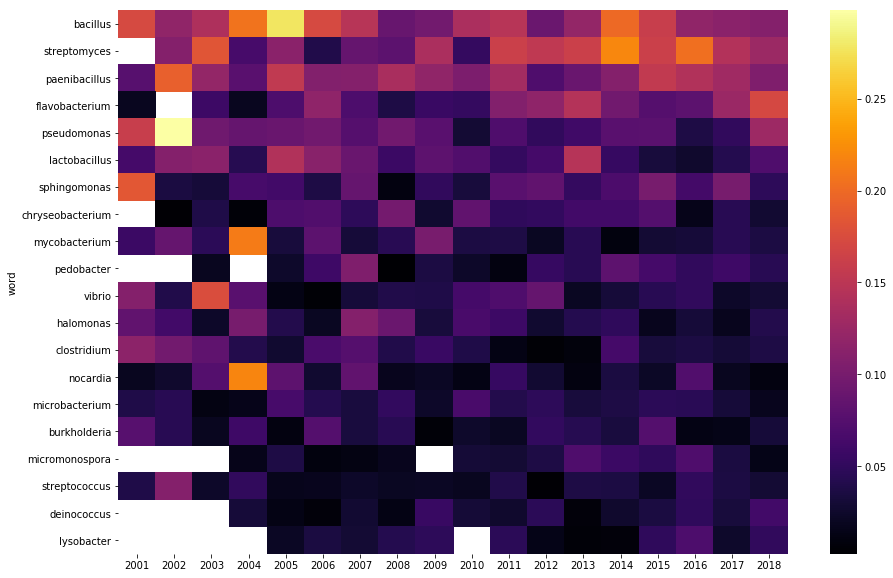

In [72]:
plt.figure(figsize=(15,10))
sns.heatmap(genus, cmap="inferno")

In [47]:
markers = transposed_relative[['gyrb', 'rpob', 'reca', 'atpd', 'rpoa', 'rpod', 'glnii', 'dnak']].T

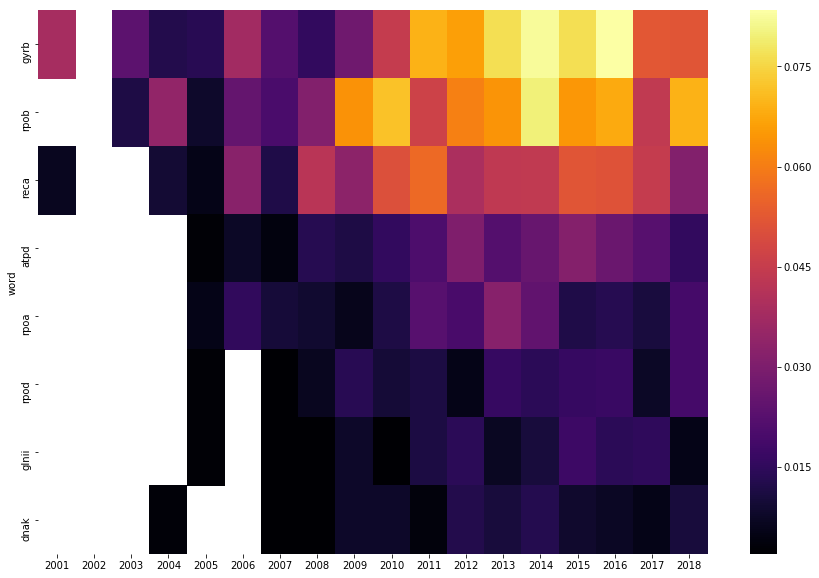

In [76]:
plt.figure(figsize=(15,10))
sns.heatmap(markers, cmap="inferno")

In [52]:
methods = transposed_relative[['rrna', 'phylogenetic', 'fatty', 'phenotypic', 'gc', 'dna-dna', 'lipids', 'chemotaxonomic', 'polyphasic', 'quinone', 'hybridization', 'genomic', 'physiological', 'genotypic', 'biochemical', 'lipid', 'peptidoglycan', 'morphological', 'genome', 'ani', 'anib', 'ggdc', 'dddh', 'gani']].T

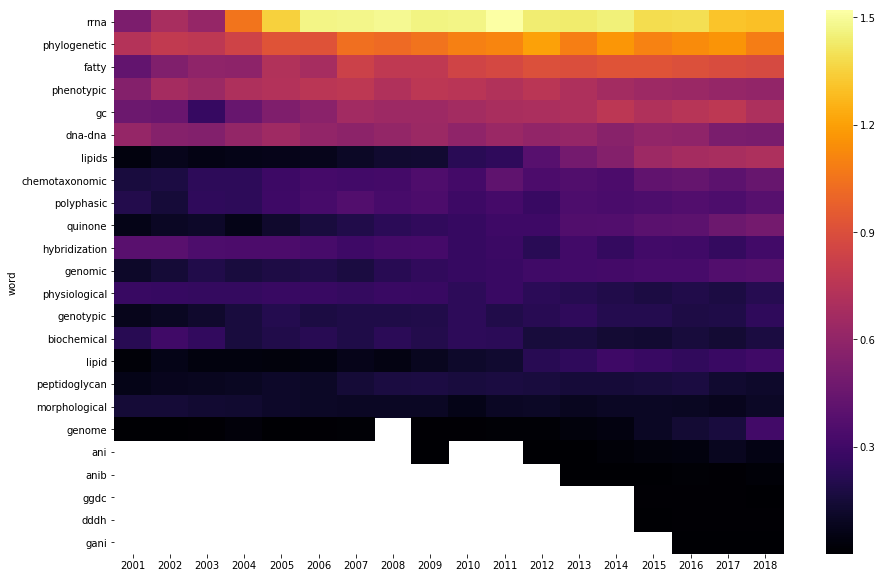

In [73]:
plt.figure(figsize=(15,10))
sns.heatmap(methods, cmap="inferno")

In [79]:
phenotype = transposed_relative[['aerobic', 'rod-shaped', 'gram-negative', 'non-motile', 'motile', 'anaerobic', 'gram-stain-negative', 'rods', 'non-spore-forming', 'gram-positive', 'halophilic', 'gram-stain-positive', 'catalase-positive', 'oxidase-positive', 'thermophilic', 'gram-staining-negative', 'endospore-forming', 'rod', 'mycelium', 'mesophilic', 'heterotrophic', 'spore-forming', 'coccoid', 'catalase-negative', 'gram-reaction-negative']].T

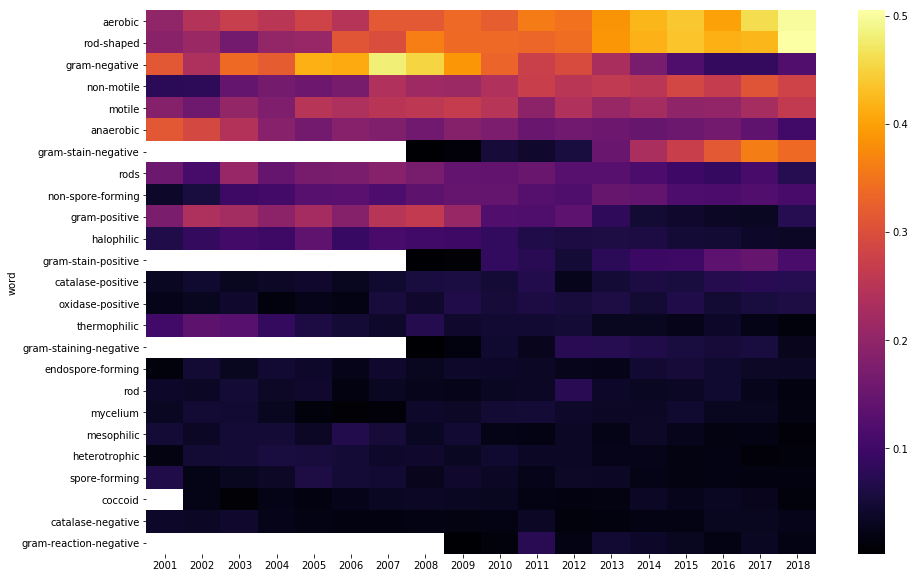

In [80]:
plt.figure(figsize=(15,10))
sns.heatmap(phenotype, cmap="inferno")

In [82]:
site = transposed_relative[['soil', 'water', 'lake', 'human', 'plant', 'rhizosphere', 'root', 'ginseng']].T

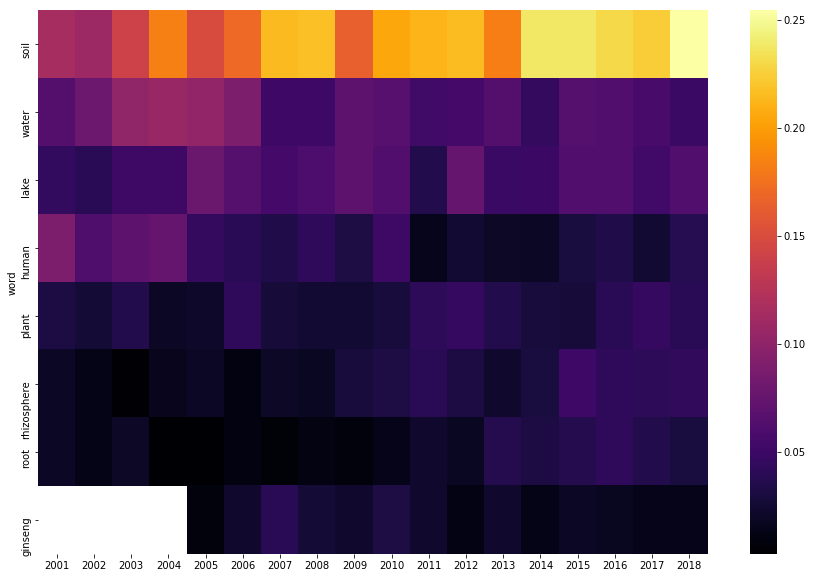

In [85]:
plt.figure(figsize=(15,10))
sns.heatmap(site, cmap="inferno")